In [85]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft
from scipy import stats


#import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn.decomposition import PCA


from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics

nx,ny=64,146
FA_spatial=np.load('full_spatial_features.npy')

ratio=ny/nx

pca = PCA(n_components=64, svd_solver='randomized')
pca_features=pca.fit_transform(FA_spatial)#components_
#pca_features=FA_spatial
connectivity = grid_to_graph(n_x=nx, n_y=ny)
ward = cluster.AgglomerativeClustering(n_clusters=400, connectivity=connectivity, linkage='ward').fit(pca_features)
labels = ward.labels_
#labels=labels.reshape((nx,ny))

sil=metrics.silhouette_samples(pca_features,labels)

np.save('sil.npy',sil.reshape((nx,ny)))
np.save('label.npy',labels.reshape((nx,ny)))


#fig = plt.figure(constrained_layout=False,figsize=(12,12))


#plt.imshow(sil.reshape((nx,ny)),cmap='RdBu')
#plt.axis('off')

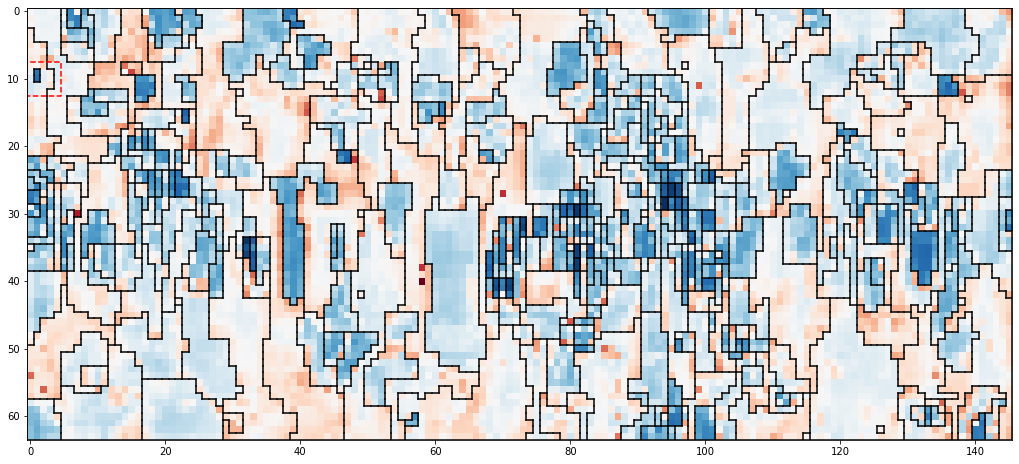

In [86]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft
from scipy import stats


#import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn.decomposition import PCA


from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics

def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot(np.array([0,nx,nx,0,0])-0.5,np.array([0,0,ny,ny,0])-0.5,'k')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot(np.array([i,i+1])-0.5,np.array([j+1,j+1])-0.5,'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot(np.array([i+1,i+1])-0.5,np.array([j,j+1])-0.5,'k')
    return None

sil,labels=np.load('sil.npy'),np.load('label.npy')
fig = plt.figure(constrained_layout=False,figsize=(12,12))

gs = fig.add_gridspec(nrows=1, ncols=1, left=0, right=0.5*ratio,bottom=0,top=0.5, wspace=0.07,hspace=0.14)#,sharex=True)

ax = fig.add_subplot(gs[0,0])

ax.imshow(sil.reshape((nx,ny)),cmap='RdBu')

#x1, x2, y1, y2 = 56,61,37,42
x1, x2, y1, y2 = 0,5,8,13

#draw(ax,np.flip(np.flip(labels.reshape((nx,ny)).T,0),1))
draw(ax,labels.reshape((nx,ny)).T)

ax.plot(np.array([x1,x1,x2,x2,x1])-0.5,np.array([y1,y2,y2,y1,y1])-0.5,'r--')


(64, 146, 3)


<Figure size 432x288 with 0 Axes>

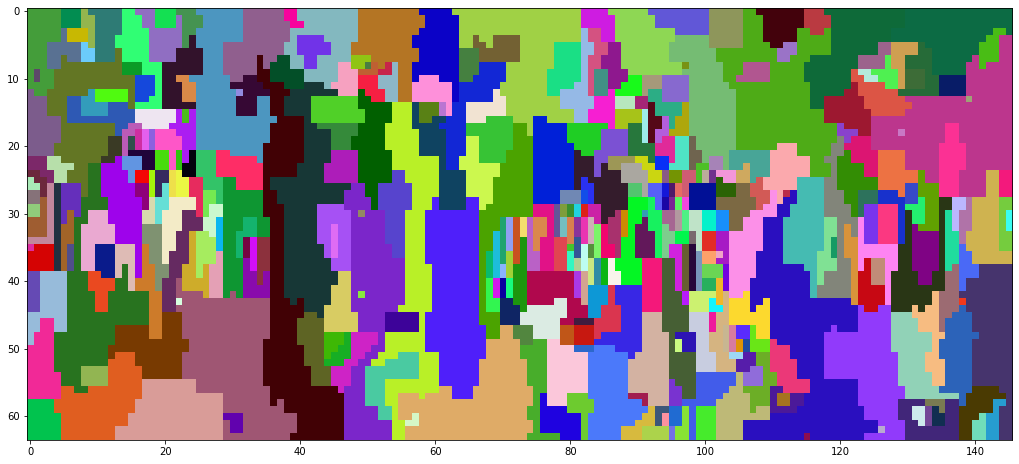

In [82]:
plt.clf()
colors=np.random.uniform(size=(np.unique(labels).shape[0],3))
im=np.zeros(tuple(list(labels.shape)+[3]))
for k in range(nx):
    for l in range(ny):
        im[k,l]=colors[labels[k,l]]
print(im.shape)

fig = plt.figure(constrained_layout=False,figsize=(12,12))

gs = fig.add_gridspec(nrows=1, ncols=1, left=0, right=0.5*ratio,bottom=0,top=0.5, wspace=0.07,hspace=0.14)#,sharex=True)

ax = fig.add_subplot(gs[0,0])
ax.imshow(im)

CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
CCDLabel in readCCDimage TIFF Format
----> Using libtiff...


<Figure size 432x288 with 0 Axes>

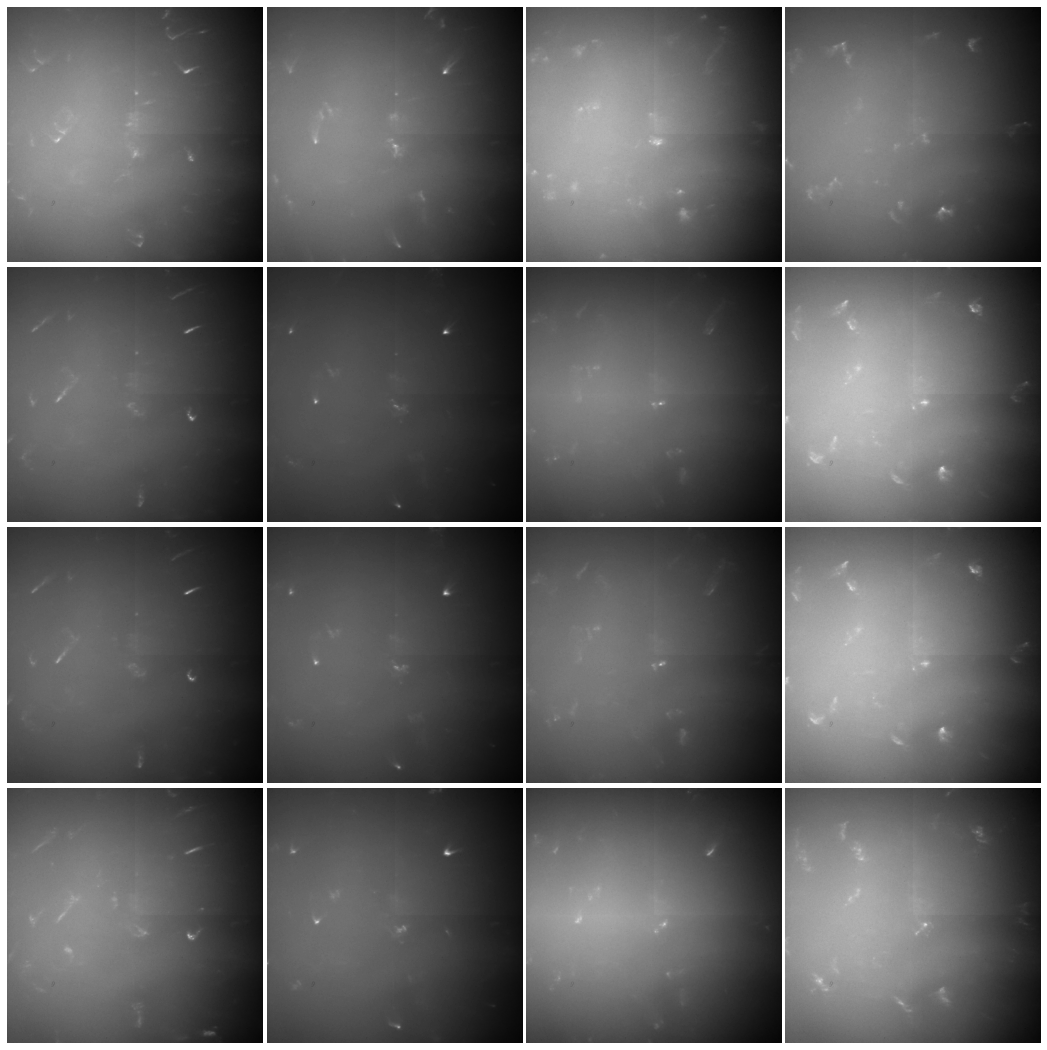

In [34]:
plt.clf()
import lauetools.LaueTools.IOimagefile as IOimage
fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=5, ncols=5, left=0, right=1.5,bottom=0,top=1.5, wspace=0.002,hspace=0.02)

#x1, x2, y1, y2 = 0,5,0,5

#s_range=range(64)
#c_range=range(146)

s_range=range(y1,y2)
c_range=range(x1,x2)

for i in s_range:
    for j in c_range:
        if (i >= 100):
            str_i=str(i)
        else:
            if (i >= 10):
                str_i='0'+str(i)
            else:
                str_i='00'+str(i)
        if (j >= 100):
            str_j=str(j)
        else:
            if (j >= 10):
                str_j='0'+str(j)
            else:
                str_j='00'+str(j)
        path="../XRD_images/2nd_saving/"+"140_S"+str_i+"_C"+str_j+".TIFF"
        im=IOimage.readCCDimage(path,CCDLabel='TIFF Format')[0]
        ax = fig.add_subplot(gs[i-min(s_range),j-min(c_range)])
        ax.axis('off')
        im=ax.imshow(im,cmap='gray')
